In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import lda
import lda.datasets
from pprint import pprint

In [2]:
# document-term matrix
X = lda.datasets.load_reuters()
print("type(X): {}".format(type(X)))
print("shape: {}\n".format(X.shape))
print(X[:10, :10])

# the vocab
vocab = lda.datasets.load_reuters_vocab()
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}\n".format(len(vocab)))
print(vocab[:10])

# titles for each story
titles = lda.datasets.load_reuters_titles()
print("type(titles): {}".format(type(titles)))
print("len(titles): {}\n".format(len(titles)))
pprint(titles[:10])

type(X): <type 'numpy.ndarray'>
shape: (395, 4258)

[[ 1  0  1  0  0  0  1  0  0  1]
 [ 7  0  2  0  0  0  0  1  0  0]
 [ 0  0  0  1 10  0  4  1  1  0]
 [ 6  0  1  0  0  0  1  1  1  0]
 [ 0  0  0  2 14  1  1  0  2  1]
 [ 0  0  2  2 24  0  2  0  2  1]
 [ 0  0  0  2  7  1  1  0  1  0]
 [ 0  0  2  2 20  0  2  0  3  1]
 [ 0  1  0  2 17  2  2  0  0  0]
 [ 2  0  2  0  0  2  0  1  0  3]]
type(vocab): <type 'tuple'>
len(vocab): 4258

('church', 'pope', 'years', 'people', 'mother', 'last', 'told', 'first', 'world', 'year')
type(titles): <type 'tuple'>
len(titles): 395

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25',
 "5 INDIA: Mother Teresa

In [3]:
print 'LDA start ----'
topic_num = 20
model = lda.LDA(n_topics=topic_num, n_iter=800, random_state=1)
model.fit(X)

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 800


LDA start ----


INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -664459
INFO:lda:<230> log likelihood: -664360
INFO:lda:<240> log likelihood: -663600
INFO:lda:<250> log likelihood: -664

<lda.lda.LDA instance at 0x7fa26c5f7f80>

In [4]:
# topic-word
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))
print(vocab[:5])
print(topic_word[:, :5])

# Print Topic distribution
n = 7
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n + 1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

# Document - topic
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))
for i in range(10):
    topic_most_pr = doc_topic[i].argmax()
    print(u"文档: {} 主题: {} value: {}".format(i, topic_most_pr, doc_topic[i][topic_most_pr]))

type(topic_word): <type 'numpy.ndarray'>
shape: (20, 4258)
('church', 'pope', 'years', 'people', 'mother')
[[  3.49335215e-06   3.49335215e-06   3.49335215e-06   3.49335215e-06
    3.49335215e-06]
 [  2.43385202e-02   1.10624609e-06   1.10624609e-06   8.85107494e-03
    1.10624609e-06]
 [  3.41022972e-03   4.86480701e-06   2.92374901e-03   4.86480701e-06
    4.86480701e-06]
 [  2.79440448e-06   2.79440448e-06   2.79440448e-06   2.79719889e-03
    2.79440448e-06]
 [  3.64791716e-03   8.85063263e-02   1.65739080e-06   1.65739080e-06
    1.65739080e-06]
 [  9.99263610e-03   2.85422339e-06   2.85422339e-06   2.85422339e-06
    2.85422339e-06]
 [  2.95894756e-06   2.95894756e-06   2.95894756e-06   2.95894756e-06
    2.95894756e-06]
 [  1.25264202e-02   5.00856465e-06   5.00856465e-06   5.00856465e-06
    3.50649611e-02]
 [  4.41827693e-03   2.00739524e-06   7.63010932e-03   3.41457931e-03
    2.00739524e-06]
 [  3.79331325e-04   3.75575570e-06   3.75575570e-06   3.38393588e-03
    3.7557557

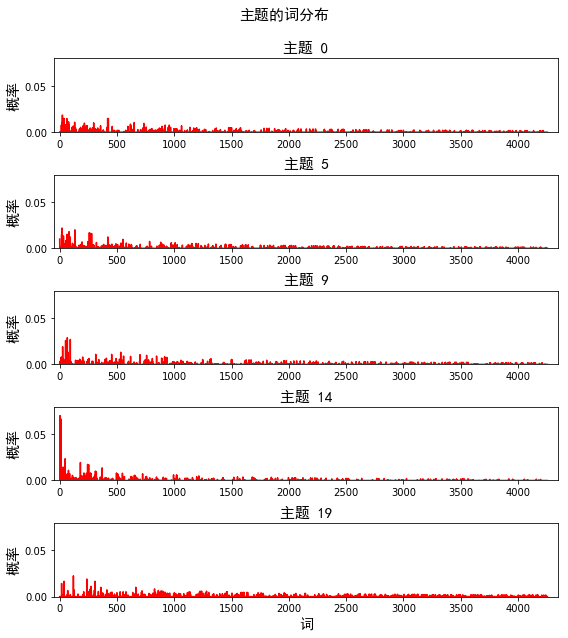

In [7]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# Topic - word
plt.figure(figsize=(8, 9))
# f, ax = plt.subplots(5, 1, sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax = plt.subplot(5, 1, i + 1)
    ax.plot(topic_word[k, :], 'r-')
    ax.set_xlim(-50, 4350)  # [0,4258]
    ax.set_ylim(0, 0.08)
    ax.set_ylabel(u"概率", fontproperties=fontproperties)
    ax.set_title(u"主题 {}".format(k), fontproperties=fontproperties)
plt.xlabel(u"词", fontsize=14, fontproperties=fontproperties)
plt.tight_layout()
plt.suptitle(u'主题的词分布', fontsize=18, fontproperties=fontproperties)
plt.subplots_adjust(top=0.9)
plt.show()

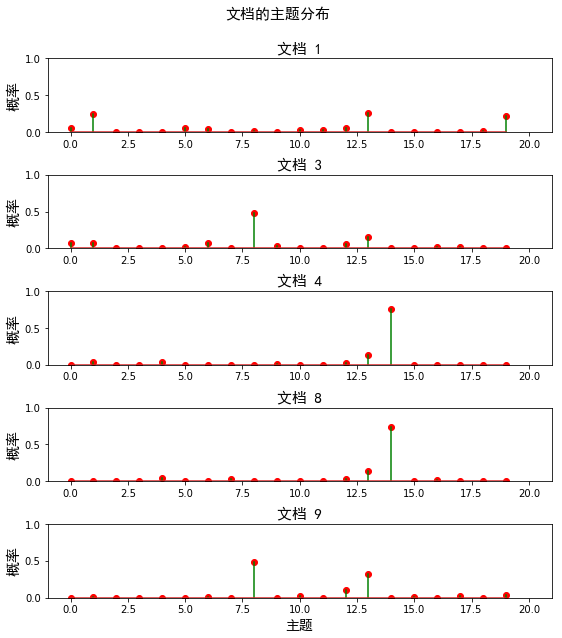

In [8]:
# Document - Topic
plt.figure(figsize=(8, 9))
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax = plt.subplot(5, 1, i + 1)
    ax.stem(doc_topic[k, :], linefmt='g-', markerfmt='ro')
    ax.set_xlim(-1, topic_num + 1)
    ax.set_ylim(0, 1)
    ax.set_ylabel(u"概率", fontproperties=fontproperties)
    ax.set_title(u"文档 {}".format(k), fontproperties=fontproperties)
plt.xlabel(u"主题", fontsize=14, fontproperties=fontproperties)
plt.suptitle(u'文档的主题分布', fontsize=18, fontproperties=fontproperties)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()